<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data_path = '/content/drive/My Drive/Dataset/diabetes.csv'
pima = pd.read_csv(data_path)
pima_tr = pima.sample(n = 200, replace = False)
pima_te = pima.sample(n = 332)

In [139]:
pima_tr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
362,5,103,108,37,0,39.2,0.305,65,0
560,6,125,76,0,0,33.8,0.121,54,1
720,4,83,86,19,0,29.3,0.317,34,0
725,4,112,78,40,0,39.4,0.236,38,0
158,2,88,74,19,53,29.0,0.229,22,0


In [0]:
negtive_sample, positive_sample = pima_tr.groupby('Outcome')
positive_sample, negtive_sample = positive_sample[1], negtive_sample[1]

In [0]:
def computate_expectation_variance(df):
  x = np.matrix([df['Glucose'].tolist(), df['BMI'].tolist()])
  u = np.matrix([[x[0].mean()],[x[1].mean()]])
  sigma = (x-u) * (x-u).T / df.shape[0]
  return u,sigma

In [0]:
u_p, sigma_p = computate_expectation_variance(positive_sample)
u_n, sigma_n = computate_expectation_variance(negtive_sample)
p_p, p_n = len(positive_sample)/len(pima_tr), len(negtive_sample)/len(pima_tr)
S = sigma_n.I - sigma_p.I
c = u_p.T*sigma_p.I - u_n.T*sigma_n.I
F = u_n.T*sigma_n.I*u_n - u_p.T*sigma_p.I*u_p + log(np.linalg.det(sigma_n)/np.linalg.det(sigma_p))-2*log(p_n/p_p)

In [0]:
def quadratic_if(x,y):
  x = np.matrix([[x],[y]])
  bias = (x.T*S*x + 2*c*x + F).getA()
  return bias[0][0]

In [0]:
sigma_co = p_p*sigma_p + p_n*sigma_n
c_l = u_p.T*sigma_co.I - u_n.T*sigma_co.I
F_l = u_n.T*sigma_co.I*u_n - u_p.T*sigma_co.I*u_p + log(1)-2*log(p_n/p_p)

In [0]:
def linear_if(x,y):
  x = np.matrix([[x],[y]])
  bias = (2*c_l*x + F_l).getA()
  return bias[0][0]

<a list of 7 text.Text objects>

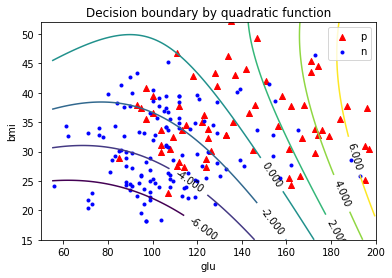

In [146]:
plt.figure('Decision boundary by quadratic function')
plt.title('Decision boundary by quadratic function')
plt.scatter(positive_sample['Glucose'], positive_sample['BMI'], marker='^', color='red', label='p')
plt.scatter(negtive_sample['Glucose'], negtive_sample['BMI'], marker='.', color='blue', label='n')
plt.xlim(50, 200)
plt.ylim(15, 52)
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend()

x = np.arange(55, 200, 0.3625)
y = np.arange(15, 55, 0.1)
z = np.empty((len(x),len(y)),dtype='float')
for i in range(len(y)):
  for j in range(len(x)):
    z[i][j] = quadratic_if(x[j],y[i])
contour = plt.contour(x, y, z, [-6,-4,-2,0,2,4,6])
plt.clabel(contour, colors=('k'))

<a list of 7 text.Text objects>

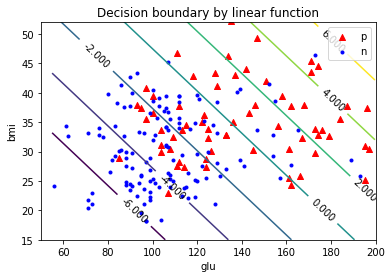

In [150]:
plt.figure('Decision boundary by linear function')
plt.title('Decision boundary by linear function')
plt.scatter(positive_sample['Glucose'], positive_sample['BMI'], marker='^', color='red', label='p')
plt.scatter(negtive_sample['Glucose'], negtive_sample['BMI'], marker='.', color='blue', label='n')
plt.xlim(50, 200)
plt.ylim(15, 52)
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend()

x = np.arange(55, 200, 0.3625)
y = np.arange(15, 55, 0.1)
z = np.empty((len(x),len(y)),dtype='float')
for i in range(len(y)):
  for j in range(len(x)):
    z[i][j] = linear_if(x[j],y[i])
contour = plt.contour(x, y, z, [-6,-4,-2,0,2,4,6])
plt.clabel(contour, colors=('k'))

In [0]:
def performace_evaluation(data_te):
  glu = np.array(data_te['Glucose'].tolist())
  bmi = np.array(data_te['BMI'].tolist())
  outcome = np.array(data_te['Outcome'])

  accuracy = [0,0]
  error_rate = [0,0]

  correct = 0
  incorrect = 0
  for i in range(data_te.shape[0]):
    if quadratic_if(glu[i],bmi[i])>0:
      if outcome[i] == 1: correct += 1
      else: incorrect += 1
    if quadratic_if(glu[i],bmi[i])<0:
      if outcome[i] == 0: correct += 1
      else: incorrect += 1
  accuracy[0] = correct / data_te.shape[0]
  error_rate[0] = incorrect / data_te.shape[0]

  correct = 0
  incorrect = 0
  for i in range(data_te.shape[0]):
    if linear_if(glu[i],bmi[i])>0:
      if outcome[i] == 1: correct += 1
      else: incorrect += 1
    if linear_if(glu[i],bmi[i])<0:
      if outcome[i] == 0: correct += 1
      else: incorrect += 1
  accuracy[1] = correct / data_te.shape[0]
  error_rate[1] = incorrect / data_te.shape[0]

  print("ErrorRate:\n quadratic {:.2%}\tlinear {:.2%}".format(error_rate[0], error_rate[1]))
  print("Accuracy:\n quadratic {:.2%}\tlinear {:.2%}".format(accuracy[0], accuracy[1]))

In [157]:
performace_evaluation(pima_tr)

ErrorRate:
 quadratic 22.00%	linear 23.00%
Accuracy:
 quadratic 78.00%	linear 77.00%
